<a href="https://colab.research.google.com/github/luisianadiaz/luisianapersonal/blob/main/PRY_Quest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. ¿Existe alguna relación entre el consumo de vinos y licores y la edad y género de los clientes?

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds, _= default()
gc = gspread.authorize(creds)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [ ]:
#Bring information csv with HEADERS
url='https://drive.google.com/file/d/1fMzUcwP5uS2F2Zncz9e_vEj6FYzCHpPa/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, header=[1])
df.tail(4)

,CustomerId,Movilidad,Centro Nocturno,NSE AB,C+,Servicios públicos y comercio al por mayor,Comercio por menor,Centro Cultural,Centro Recreativo,NSE D,...,mar-20,Apr-20,may-20,jun-20,jul-20,Aug-20,sep-20,oct-20,nov-20,Dec-20
46703,46704,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1911.0,...,0,0,0,0,0,0,0,0,0,0
46704,46705,NaN,0.0,320.0,54.0,3.0,0.0,0.0,0.0,1411.0,...,0,0,0,0,0,0,0,0,0,0
46705,46706,NaN,0.0,85.0,298.0,6.0,0.0,0.0,0.0,360.0,...,0,0,0,0,0,0,0,0,0,0
46706,46707,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2996.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

CustomerId                                      int64
Movilidad                                     float64
Centro Nocturno                               float64
NSE AB                                        float64
C+                                            float64
Servicios públicos y comercio al por mayor    float64
Comercio por menor                            float64
Centro Cultural                               float64
Centro Recreativo                             float64
NSE D                                         float64
NSE E                                         float64
0 - 17 hombres                                float64
0 -17 mujeres                                 float64
VinosYLicores                                 float64
Jan-20                                          int64
feb_20                                          int64
mar-20                                          int64
Apr-20                                          int64
may-20                      

In [ ]:
df.columns

Index(['CustomerId', 'Movilidad', 'Centro Nocturno', 'NSE AB', 'C+',
       'Servicios públicos y comercio al por mayor', 'Comercio por menor',
       'Centro Cultural', 'Centro Recreativo', 'NSE D', 'NSE E',
       '0 - 17 hombres', '0 -17 mujeres', 'VinosYLicores', 'Jan-20', 'feb_20',
       'mar-20', 'Apr-20', 'may-20', 'jun-20', 'jul-20', 'Aug-20', 'sep-20',
       'oct-20', 'nov-20', 'Dec-20'],
      dtype='object')

In [ ]:
#Bring only the columns for Vinos y licores, genero y edad
df_new = df[['VinosYLicores','0 - 17 hombres','0 -17 mujeres']]
df_new

,VinosYLicores,0 - 17 hombres,0 -17 mujeres
0,1.0,1322.0,1283.0
1,0.0,1861.0,1779.0
2,1.0,1378.0,1292.0
3,1.0,1391.0,1408.0
4,0.0,1087.0,944.0
...,...,...,...
46702,NaN,1501.0,1464.0
46703,NaN,644.0,560.0
46704,NaN,761.0,750.0
46705,NaN,286.0,263.0


In [ ]:
#Fill NaN values to df_new
df_new.fillna(0, inplace=True)
df_new

<ipython-input-47-6e39c3ae5717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.fillna(0, inplace=True)


,VinosYLicores,0 - 17 hombres,0 -17 mujeres
0,1.0,1322.0,1283.0
1,0.0,1861.0,1779.0
2,1.0,1378.0,1292.0
3,1.0,1391.0,1408.0
4,0.0,1087.0,944.0
...,...,...,...
46702,0.0,1501.0,1464.0
46703,0.0,644.0,560.0
46704,0.0,761.0,750.0
46705,0.0,286.0,263.0


In [ ]:
df_new
profile = pp.ProfileReport(df_new)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

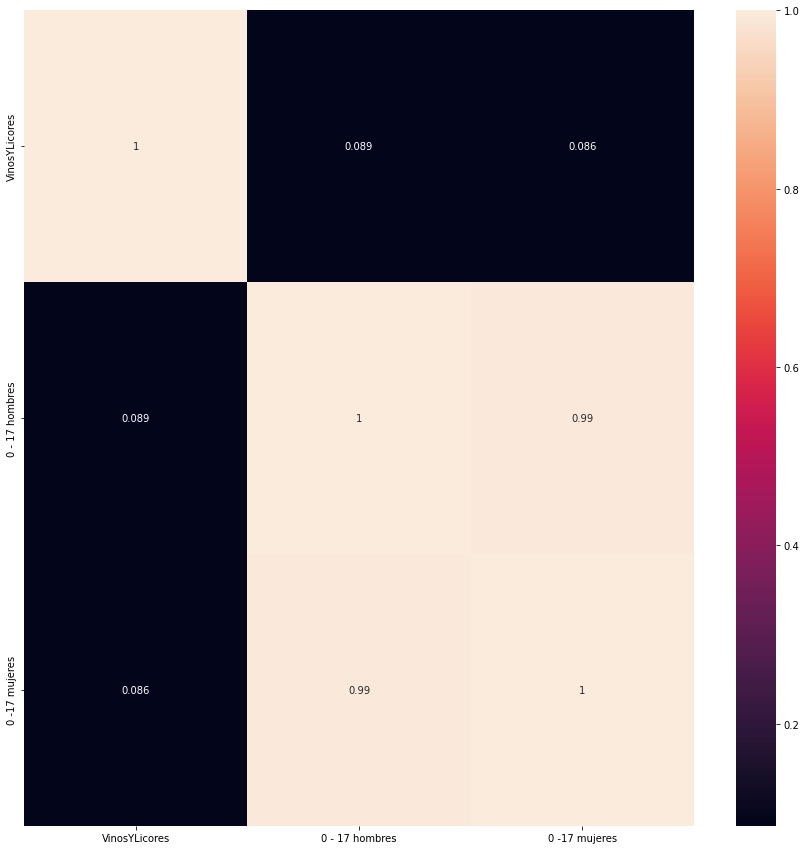

In [ ]:
# Running Correlation Matrix
correl_matrix = df_new.corr()
sns.heatmap(correl_matrix, annot=True, xticklabels=True, yticklabels=True)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [ ]:
# Otro intento con scatter
df_new.tail(4)

,VinosYLicores,0 - 17 hombres,0 -17 mujeres
46703,0.0,644.0,560.0
46704,0.0,761.0,750.0
46705,0.0,286.0,263.0
46706,0.0,645.0,695.0


In [ ]:
df2 = df_new[['VinosYLicores','0 - 17 hombres']]
df2

,VinosYLicores,0 - 17 hombres
0,1.0,1322.0
1,0.0,1861.0
2,1.0,1378.0
3,1.0,1391.0
4,0.0,1087.0
...,...,...
46702,0.0,1501.0
46703,0.0,644.0
46704,0.0,761.0
46705,0.0,286.0


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='VinosYLicores', ylabel='0 - 17 hombres'>

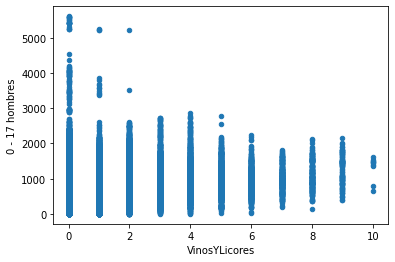

In [ ]:
df2.plot.scatter(x = 'VinosYLicores', y = '0 - 17 hombres')

In [ ]:
df3 = df_new[['VinosYLicores','0 -17 mujeres']]
df3

,VinosYLicores,0 -17 mujeres
0,1.0,1283.0
1,0.0,1779.0
2,1.0,1292.0
3,1.0,1408.0
4,0.0,944.0
...,...,...
46702,0.0,1464.0
46703,0.0,560.0
46704,0.0,750.0
46705,0.0,263.0


<Axes: xlabel='VinosYLicores', ylabel='0 -17 mujeres'>

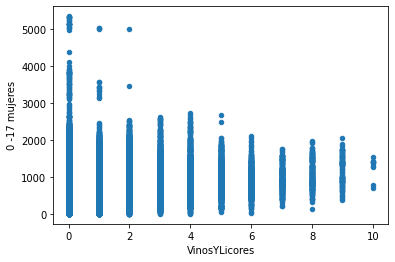

In [ ]:
df3.plot.scatter(x = 'VinosYLicores', y = '0 -17 mujeres')